In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [17]:
# Reading the train.csv by removing the 
# last column since it's an empty column
DATA_PATH = "training_disease_prediction.csv"
df = pd.read_csv(DATA_PATH).dropna(axis = 1)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


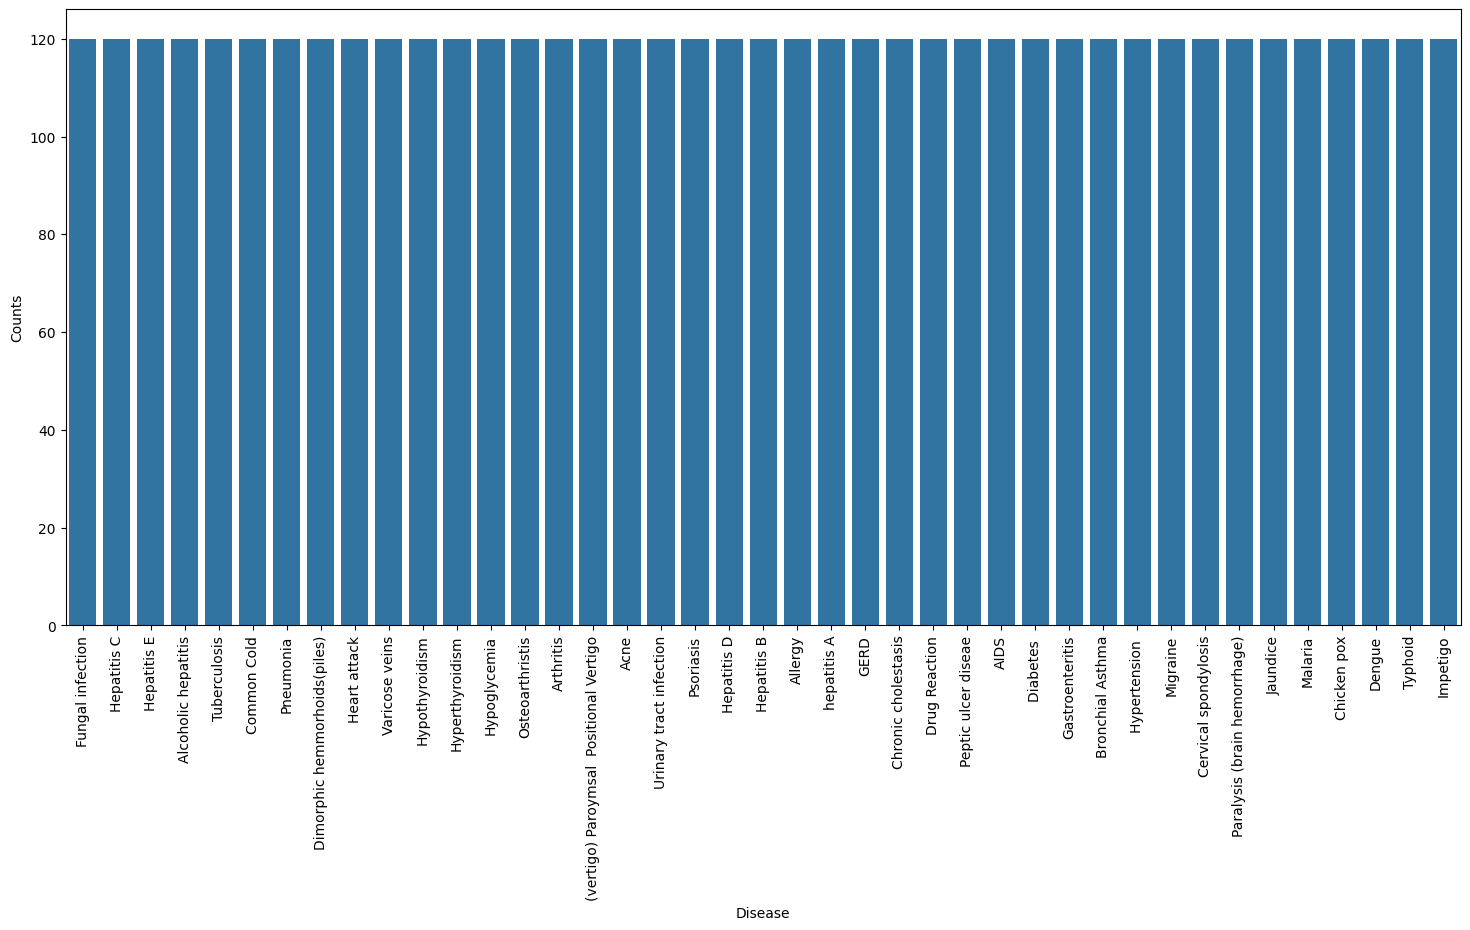

In [18]:
# Checking whether the dataset is balanced or not
disease_counts = df["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [19]:
#encoding
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])

In [20]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [21]:
#defining scoring metrics for k-fold
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=24)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, n_jobs = -1, scoring = cv_scoring)
    print("===========================")
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean score: 1.0


===== SVC =====
Accuracy on train data: 100.00%
Accuracy on test data: 100.00%


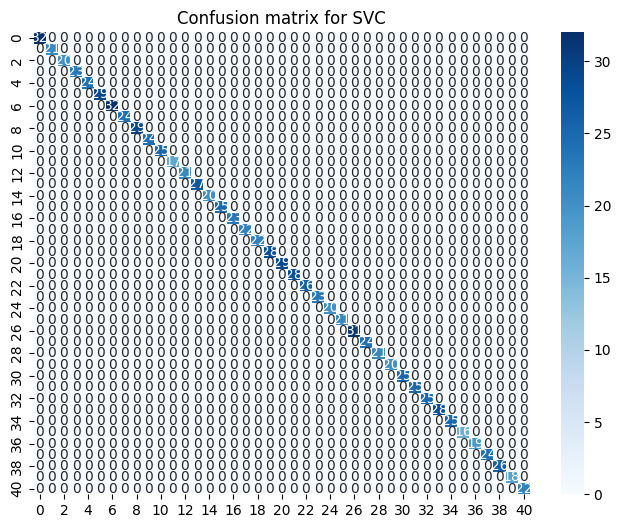

===== Gaussian NB =====
Accuracy on train data: 100.00%
Accuracy on test data: 100.00%


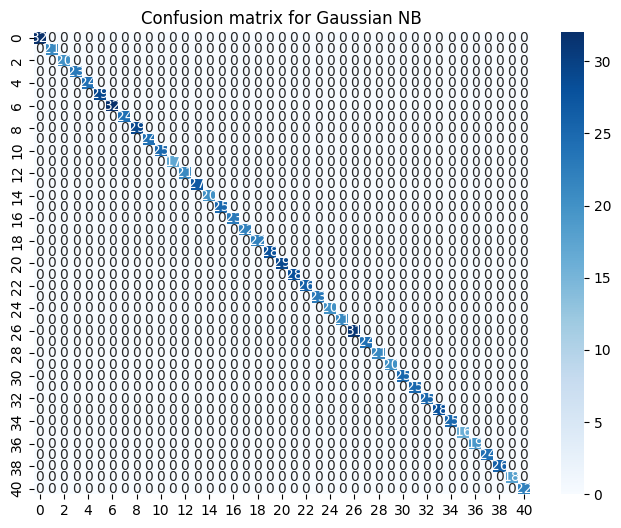

===== Random Forest =====
Accuracy on train data: 100.00%
Accuracy on test data: 100.00%


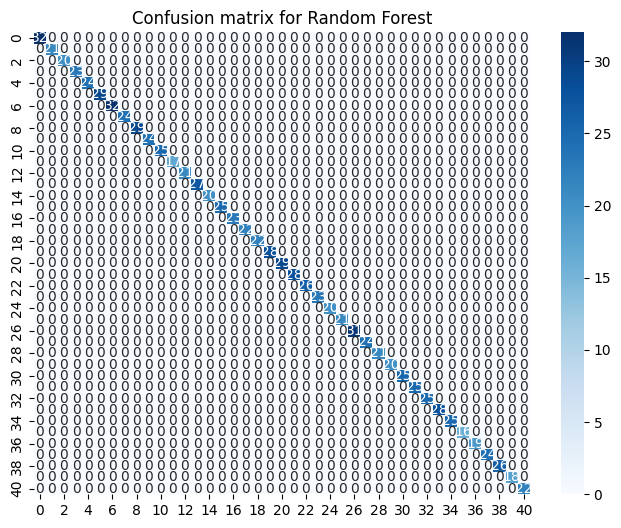

In [26]:
# Training, testing, and visualization
for name, model in models.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    #acc
    train_acc = accuracy_score(y_train, train_pred)*100
    test_acc = accuracy_score(y_test, test_pred)*100
    print(f"===== {name} =====")
    print(f"Accuracy on train data: {train_acc:.2f}%")
    print(f"Accuracy on test data: {test_acc:.2f}%")
    #confusion matrix
    cf_matrix = confusion_matrix(y_test, test_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion matrix for {name}")
    plt.show()

# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("./dataset/Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions 
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

!pip install scipy
from scipy import stats

final_preds = [stats.mode([i,j,k])[0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

Accuracy on Test dataset by the combined model: 100.00%


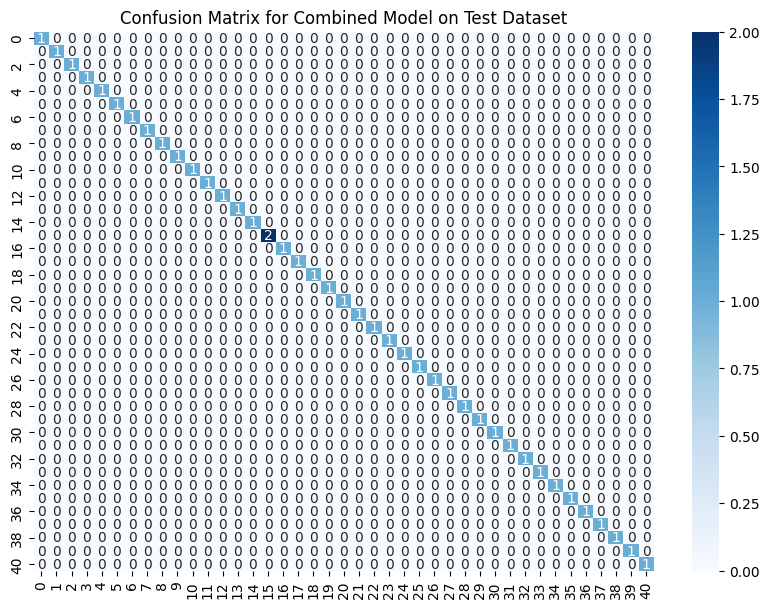

In [32]:
from scipy import stats
# Defining and training models
models = {
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

for name, model in models.items():
    model.fit(X, y)

# Reading and preprocessing test data
test_data = pd.read_csv("testing_disease_prediction.csv").dropna(axis=1)
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making predictions
predictions = {name: model.predict(test_X) for name, model in models.items()}

# Combining predictions using mode
final_preds = stats.mode(list(predictions.values()), axis=0)[0]

# Calculating accuracy
accuracy = accuracy_score(test_Y, final_preds) * 100
print(f"Accuracy on Test dataset by the combined model: {accuracy:.2f}%")

# Visualizing confusion matrix
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

# This code is modified by Susobhan Akhuli


In [35]:
import statistics

# Define the models
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Creating symptom index dictionary
symptoms = X.columns.values
symptom_index = { " ".join([i.capitalize() for i in value.split("_")]): index for index, value in enumerate(symptoms)}

# Predefined encoder classes (assuming encoder is defined elsewhere)
data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

# Define the function
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # Create input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1
    
    # Reshape input data for prediction
    input_data = np.array(input_data).reshape(1, -1)
    
    # Get predictions from each model
    model_predictions = {
        "rf_model_prediction": data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]],
        "naive_bayes_prediction": data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]],
        "svm_model_prediction": data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    }
    
    # Final prediction by mode
    final_prediction = statistics.mode(list(model_predictions.values()))
    
    model_predictions["final_prediction"] = final_prediction
    
    # Printing the predictions with bullet points
    print("Predictions:")
    for key, value in model_predictions.items():
        print(f"- {key}: {value}")
        
    return model_predictions

# Test the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


Predictions:
- rf_model_prediction: Fungal infection
- naive_bayes_prediction: Fungal infection
- svm_model_prediction: Fungal infection
- final_prediction: Fungal infection
{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\Users\TUF Gaming\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\TUF Gaming\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\TUF Gaming\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [48]:
print(predictDisease("Acute Liver Failure"))

Predictions:
- rf_model_prediction: Hepatitis E
- naive_bayes_prediction: Allergy
- svm_model_prediction: AIDS
- final_prediction: Hepatitis E
{'rf_model_prediction': 'Hepatitis E', 'naive_bayes_prediction': 'Allergy', 'svm_model_prediction': 'AIDS', 'final_prediction': 'Hepatitis E'}


C:\Users\TUF Gaming\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\TUF Gaming\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\TUF Gaming\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
